In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mimiciv_dir = 'data/mimic-iv-1.0/hosp'

## Read data

In [3]:
df_event = pd.read_csv(f'{mimiciv_dir}/diagnoses_icd.csv', low_memory=False)

In [4]:
df_code = pd.read_csv(f'{mimiciv_dir}/d_icd_diagnoses.csv', low_memory=False)

In [5]:
drgcodes = pd.read_csv(f'{mimiciv_dir}/drgcodes.csv', low_memory=False)

In [6]:
final_cohort_all = pd.read_csv('final_cohort.csv', low_memory=False)
final_cohort_selected = pd.read_csv('final_cohort_selected.csv', low_memory=False)

In [7]:
# merge to get icd and drg info
icds = pd.merge(df_event, df_code, on = ['icd_code','icd_version'], how='left')
final_cohort_selected = pd.merge(final_cohort_selected, icds, on = ['hadm_id', 'subject_id'], how='left')
final_cohort_selected = pd.merge(final_cohort_selected, drgcodes, on = ['hadm_id', 'subject_id'], how='left')

In [8]:
final_cohort_selected = final_cohort_selected.drop(columns=['drg_severity', 'drg_mortality'])

In [9]:
print("Num selected cohort hadms:", len(final_cohort_selected.hadm_id.unique()))
final_drg = final_cohort_selected.dropna(subset=['drg_code'], how='any')
print("Num selected cohort hadms with drg codes:", len(final_drg.hadm_id.unique()))
# select only rows where drg code says "heart failure" or "hf"
final_drg_hf = final_drg[final_drg['description'].str.contains('hf|heart failure', case=False)]
# there are some drg codes that specify "w/o hf" or "w/o heart failure" - don't include those rows
final_drg_hf = final_drg_hf[~final_drg_hf['description'].str.contains('W/O AMI/HF/SHOCK|W/O AMI, HEART FAILURE OR SHOCK', case=False)]
print("Num selected cohort hadms with drg codes specifying hf:", len(final_drg_hf.hadm_id.unique()))

Num selected cohort hadms: 24824
Num selected cohort hadms with drg codes: 24105
Num selected cohort hadms with drg codes specifying hf: 7285


## Charts for DRG counts

In [10]:
# make sure we only count each drg code for each hadm once 
drop_dup_drg = final_drg.drop_duplicates(subset=['hadm_id', 'drg_code'])
drop_dup_drg[:10]

,Unnamed: 0,subject_id,hadm_id,chronic_dialysis,CHF exacerbation,seq_num,icd_code,icd_version,long_title,drg_type,drg_code,description
0,1155,16477997,25359811,False,True,14,4254,9,Other primary cardiomyopathies,HCFA,219.0,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W/...
1,1155,16477997,25359811,False,True,14,4254,9,Other primary cardiomyopathies,APR,163.0,CARDIAC VALVE PROCEDURES W/O AMI OR COMPLEX PDX
28,1215,14959277,28740655,False,True,7,41401,9,Coronary atherosclerosis of native coronary ar...,HCFA,220.0,CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W/...
29,1215,14959277,28740655,False,True,7,41401,9,Coronary atherosclerosis of native coronary ar...,APR,163.0,CARDIAC VALVE PROCEDURES W/O AMI OR COMPLEX PDX
50,1668,12849817,27891695,False,True,4,9971,9,"Cardiac complications, not elsewhere classified",HCFA,330.0,MAJOR SMALL & LARGE BOWEL PROCEDURES W CC
66,1784,11508679,25781770,False,True,1,44021,9,Atherosclerosis of native arteries of the extr...,HCFA,253.0,OTHER VASCULAR PROCEDURES W CC
75,1829,18151621,25727457,False,True,11,5859,9,"Chronic kidney disease, unspecified",HCFA,625.0,"THYROID, PARATHYROID & THYROGLOSSAL PROCEDURES..."
76,1829,18151621,25727457,False,True,11,5859,9,"Chronic kidney disease, unspecified",APR,404.0,"THYROID, PARATHYROID & THYROGLOSSAL PROCEDURES"
101,2519,12711129,26466704,False,True,2,03811,9,Methicillin susceptible Staphylococcus aureus ...,HCFA,856.0,POSTOPERATIVE OR POST-TRAUMATIC INFECTIONS W O...
102,2519,12711129,26466704,False,True,2,03811,9,Methicillin susceptible Staphylococcus aureus ...,APR,711.0,"POST-OP, POST-TRAUMA, OTHER DEVICE INFECTIONS ..."


<AxesSubplot:>

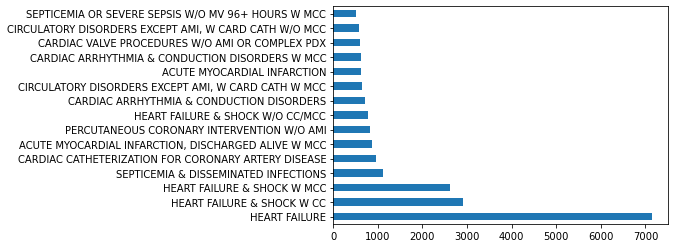

In [11]:
# plot top 15 drg codes
drop_dup_drg.description.value_counts()[:15].plot(kind='barh')

In [12]:
# select rows where DRG code contains "hf" or "heart failure"
drop_dup_drg_hf = drop_dup_drg[drop_dup_drg['description'].str.contains('hf|heart failure', case=False)]
# there are some drg codes that specify "w/o hf" or "w/o heart failure" - don't include those rows
drop_dup_drg_hf = drop_dup_drg_hf[~drop_dup_drg_hf['description'].str.contains('W/O AMI/HF/SHOCK|W/O AMI, HEART FAILURE OR SHOCK', case=False)]
drop_dup_drg_hf[:10]

,Unnamed: 0,subject_id,hadm_id,chronic_dialysis,CHF exacerbation,seq_num,icd_code,icd_version,long_title,drg_type,drg_code,description
310,4139,16730752,21584004,False,True,4,70712,9,Ulcer of calf,APR,194.0,HEART FAILURE
339,4178,18567594,29828717,False,True,14,32723,9,Obstructive sleep apnea (adult)(pediatric),HCFA,291.0,HEART FAILURE & SHOCK W MCC
340,4178,18567594,29828717,False,True,14,32723,9,Obstructive sleep apnea (adult)(pediatric),APR,194.0,HEART FAILURE
457,4411,17447473,22293942,False,True,12,78057,9,Unspecified sleep apnea,HCFA,292.0,HEART FAILURE & SHOCK W CC
458,4411,17447473,22293942,False,True,12,78057,9,Unspecified sleep apnea,APR,194.0,HEART FAILURE
495,4580,17600934,26823201,False,True,27,V103,9,Personal history of malignant neoplasm of breast,HCFA,291.0,HEART FAILURE & SHOCK W MCC
496,4580,17600934,26823201,False,True,27,V103,9,Personal history of malignant neoplasm of breast,APR,194.0,HEART FAILURE
611,4989,14261068,20086032,False,True,15,E8490,9,Home accidents,HCFA,291.0,HEART FAILURE & SHOCK W MCC
612,4989,14261068,20086032,False,True,15,E8490,9,Home accidents,APR,194.0,HEART FAILURE
681,5397,14006097,22147310,False,True,12,25000,9,Diabetes mellitus without mention of complicat...,HCFA,292.0,HEART FAILURE & SHOCK W CC


In [13]:
# add a new column that is a tuple of all the hf-related DRGs for that hadm
unique_hadms = drop_dup_drg_hf.hadm_id.unique()
drg_tuples = []

for hadm in unique_hadms:
    df_hadm = drop_dup_drg_hf[drop_dup_drg_hf['hadm_id'] == hadm]
    drg_list = df_hadm.description.to_list()
    drg_list.sort()
    for i in range(len(drg_list)):
        drg_tuples.append(tuple(drg_list))
drop_dup_drg_hf['drg_list'] = drg_tuples
drop_dup_drg_hf[:10]

,Unnamed: 0,subject_id,hadm_id,chronic_dialysis,CHF exacerbation,seq_num,icd_code,icd_version,long_title,drg_type,drg_code,description,drg_list
310,4139,16730752,21584004,False,True,4,70712,9,Ulcer of calf,APR,194.0,HEART FAILURE,"(HEART FAILURE,)"
339,4178,18567594,29828717,False,True,14,32723,9,Obstructive sleep apnea (adult)(pediatric),HCFA,291.0,HEART FAILURE & SHOCK W MCC,"(HEART FAILURE, HEART FAILURE & SHOCK W MCC)"
340,4178,18567594,29828717,False,True,14,32723,9,Obstructive sleep apnea (adult)(pediatric),APR,194.0,HEART FAILURE,"(HEART FAILURE, HEART FAILURE & SHOCK W MCC)"
457,4411,17447473,22293942,False,True,12,78057,9,Unspecified sleep apnea,HCFA,292.0,HEART FAILURE & SHOCK W CC,"(HEART FAILURE, HEART FAILURE & SHOCK W CC)"
458,4411,17447473,22293942,False,True,12,78057,9,Unspecified sleep apnea,APR,194.0,HEART FAILURE,"(HEART FAILURE, HEART FAILURE & SHOCK W CC)"
495,4580,17600934,26823201,False,True,27,V103,9,Personal history of malignant neoplasm of breast,HCFA,291.0,HEART FAILURE & SHOCK W MCC,"(HEART FAILURE, HEART FAILURE & SHOCK W MCC)"
496,4580,17600934,26823201,False,True,27,V103,9,Personal history of malignant neoplasm of breast,APR,194.0,HEART FAILURE,"(HEART FAILURE, HEART FAILURE & SHOCK W MCC)"
611,4989,14261068,20086032,False,True,15,E8490,9,Home accidents,HCFA,291.0,HEART FAILURE & SHOCK W MCC,"(HEART FAILURE, HEART FAILURE & SHOCK W MCC)"
612,4989,14261068,20086032,False,True,15,E8490,9,Home accidents,APR,194.0,HEART FAILURE,"(HEART FAILURE, HEART FAILURE & SHOCK W MCC)"
681,5397,14006097,22147310,False,True,12,25000,9,Diabetes mellitus without mention of complicat...,HCFA,292.0,HEART FAILURE & SHOCK W CC,"(HEART FAILURE, HEART FAILURE & SHOCK W CC)"


In [14]:
drop_dup_drg_hf = drop_dup_drg_hf.drop_duplicates(subset=['hadm_id', 'drg_list'])
drop_dup_drg_hf[:10]

,Unnamed: 0,subject_id,hadm_id,chronic_dialysis,CHF exacerbation,seq_num,icd_code,icd_version,long_title,drg_type,drg_code,description,drg_list
310,4139,16730752,21584004,False,True,4,70712,9,Ulcer of calf,APR,194.0,HEART FAILURE,"(HEART FAILURE,)"
339,4178,18567594,29828717,False,True,14,32723,9,Obstructive sleep apnea (adult)(pediatric),HCFA,291.0,HEART FAILURE & SHOCK W MCC,"(HEART FAILURE, HEART FAILURE & SHOCK W MCC)"
457,4411,17447473,22293942,False,True,12,78057,9,Unspecified sleep apnea,HCFA,292.0,HEART FAILURE & SHOCK W CC,"(HEART FAILURE, HEART FAILURE & SHOCK W CC)"
495,4580,17600934,26823201,False,True,27,V103,9,Personal history of malignant neoplasm of breast,HCFA,291.0,HEART FAILURE & SHOCK W MCC,"(HEART FAILURE, HEART FAILURE & SHOCK W MCC)"
611,4989,14261068,20086032,False,True,15,E8490,9,Home accidents,HCFA,291.0,HEART FAILURE & SHOCK W MCC,"(HEART FAILURE, HEART FAILURE & SHOCK W MCC)"
681,5397,14006097,22147310,False,True,12,25000,9,Diabetes mellitus without mention of complicat...,HCFA,292.0,HEART FAILURE & SHOCK W CC,"(HEART FAILURE, HEART FAILURE & SHOCK W CC)"
707,5466,18929056,21456798,False,True,4,7907,9,Bacteremia,HCFA,291.0,HEART FAILURE & SHOCK W MCC,"(HEART FAILURE, HEART FAILURE & SHOCK W MCC)"
783,5975,19492214,21338112,False,True,13,53081,9,Esophageal reflux,HCFA,291.0,HEART FAILURE & SHOCK W MCC,"(HEART FAILURE, HEART FAILURE & SHOCK W MCC)"
885,6844,10161042,21802988,False,True,6,32723,9,Obstructive sleep apnea (adult)(pediatric),HCFA,291.0,HEART FAILURE & SHOCK W MCC,"(HEART FAILURE, HEART FAILURE & SHOCK W MCC)"
1118,7488,19141953,22787470,False,True,3,23876,9,Myelofibrosis with myeloid metaplasia,HCFA,291.0,HEART FAILURE & SHOCK W MCC,"(HEART FAILURE, HEART FAILURE & SHOCK W MCC)"


<AxesSubplot:>

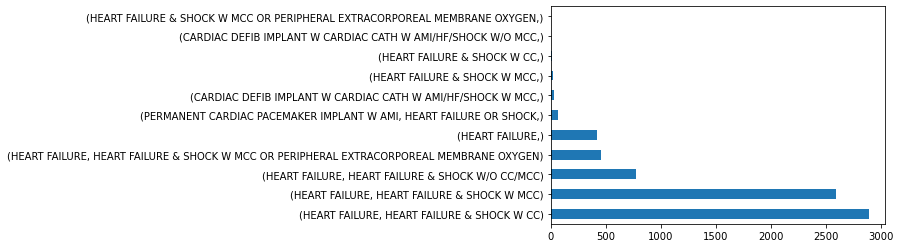

In [15]:
# Count for combos of hf related DRGs
drop_dup_drg_hf.drg_list.value_counts().plot(kind="barh")

## Charts for Number of Hospitalizations

Max num hf-related hospitalizations: 35


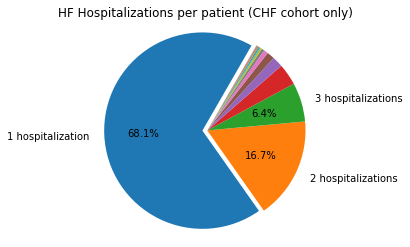

In [16]:
# Chart of number of hadms in the hf-cohort for each subject in the cohort
selected_drop_dup = final_cohort_selected.drop_duplicates(subset=['hadm_id'])
hospitalization_counts = selected_drop_dup.subject_id.value_counts().value_counts()
print("Max num hf-related hospitalizations:", max(selected_drop_dup.subject_id.value_counts().values))
labels = ['']*len(hospitalization_counts)
labels[0] = '1 hospitalization'
labels[1] = '2 hospitalizations'
labels[2] = '3 hospitalizations'

explode = np.zeros(len(hospitalization_counts))
explode[0]=0.05
fig1, ax1 = plt.subplots()
ax1.pie(hospitalization_counts, 
        explode=explode, 
        labels=labels, 
        autopct=lambda x: "{:1.1%}".format(x/100) if x > 5 else '',
        labeldistance=1.15,
        shadow=False, startangle=60)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('HF Hospitalizations per patient (CHF cohort only)')
plt.show()

Max num hospitalizations for any reason for cohort: 93


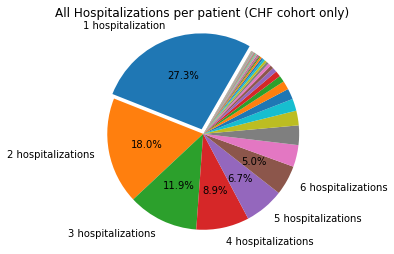

In [17]:
# Chart of number of hadms for any reason for each subject in the cohort
subjects = final_cohort_selected.subject_id.unique()
included_subjects = final_cohort_all[final_cohort_all['subject_id'].isin(subjects)]
all_subject_hadms = included_subjects.drop_duplicates(subset=['hadm_id'])

sizes = all_subject_hadms.subject_id.value_counts().value_counts()
print("Max num hospitalizations for any reason for cohort:", max(all_subject_hadms.subject_id.value_counts().values))
labels = ['']*len(sizes)
labels[0] = '1 hospitalization'
labels[1] = '2 hospitalizations'
labels[2] = '3 hospitalizations'
labels[3] = '4 hospitalizations'
labels[4] = '5 hospitalizations'
labels[5] = '6 hospitalizations'

explode = np.zeros(len(sizes))
explode[0]=0.05
fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        explode=explode, 
        labels=labels, 
        autopct=lambda x: "{:1.1%}".format(x/100) if x > 5 else '',
        labeldistance=1.15,
        shadow=False, startangle=60)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('All Hospitalizations per patient (CHF cohort only)')
plt.show()